In [218]:
import folium
import pandas as pd
import numpy as np
from datetime import datetime
import time
from sklearn.cluster import DBSCAN
from sklearn import metrics
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
import matplotlib as plt
import matplotlib.pyplot as mplt
import matplotlib.pylab as pplt
%matplotlib inline

In [29]:
yellow_cars=pd.read_csv('C:/Users/Sreekanth/Desktop/RAMESH_SHANKAR_RA/yellow_tripdata_2016-05.csv')

In [30]:
len(yellow_cars)

In [31]:
len(yellow_cars[yellow_cars['passenger_count']==1])

In [32]:
city_bikes=pd.read_csv('C:/Users/Sreekanth/Desktop/RAMESH_SHANKAR_RA/201605-citibike-tripdata.csv')

In [33]:
yellow_cars_sample=yellow_cars[yellow_cars['passenger_count']==1]
yellow_cars_sample=yellow_cars_sample.reset_index()

In [34]:
print ('Longitude min max', min(yellow_cars_sample.pickup_longitude.min(), yellow_cars_sample.dropoff_longitude.min()), max(yellow_cars_sample.pickup_longitude.max(), yellow_cars_sample.dropoff_longitude.max()))
print ('Latitude min max', min(yellow_cars_sample.pickup_latitude.min(), yellow_cars_sample.dropoff_latitude.min()), max(yellow_cars_sample.pickup_latitude.max(), yellow_cars_sample.dropoff_latitude.max()))

Longitude min max -165.081893921 118.408943176
Latitude min max -44.5693473816 70.1299438477


In [35]:
yellow_cars_sample=yellow_cars_sample[yellow_cars_sample['pickup_latitude']!=0.0]
yellow_cars_sample=yellow_cars_sample.reset_index()

In [36]:
# xlim = [-74.03, -73.77]
# ylim = [40.63, 40.85]
# df = yellow_cars[(yellow_cars.pickup_longitude> xlim[0]) & (yellow_cars.pickup_longitude < xlim[1])]
# #df = df[(yellow_cars.dropoff_longitude> xlim[0]) & (yellow_cars.dropoff_longitude < xlim[1])]
# df = df[(df.pickup_latitude> ylim[0]) & (df.pickup_latitude < ylim[1])]
# #df = df[(df.dropoff_latitude> ylim[0]) & (df.dropoff_latitude < ylim[1])]

In [37]:

list_value=[]
for g, df in yellow_cars_sample.groupby(np.arange(len(yellow_cars_sample)) // 100000):
    list_value.append(df)
len(list_value)

83

In [38]:
#code for many clusterss:

clusters = pd.Series()
DataFrame=pd.DataFrame()
Clustered_Yello_Cabs=pd.DataFrame()
xlim = [-74.00, -73.95]
ylim = [40.69, 40.81]

for p in list_value:
    #print('initial length--',len(p)
    p = p[(p.pickup_longitude> xlim[0]) & (p.pickup_longitude < xlim[1])]
    p = p[(p.pickup_latitude> ylim[0]) & (p.pickup_latitude < ylim[1])]
    #print('reduced to--',len(p)
    coords = p.as_matrix(columns=['pickup_latitude', 'pickup_longitude'])
    #print len(coords)
    kms_per_radian=6371.0088
    epsilon = 0.3/ kms_per_radian
    start_time = time.time()
    db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree').fit(np.radians(coords))
    cluster_labels = db.labels_
    
    
    # get the number of clusters
    num_clusters = len(set(cluster_labels))
    
    # all done, print the outcome
    message = 'Clustered {:,} points down to {:,} clusters, for {:.1f}% compression in {:,.2f} minutes'
    print(message.format(len(p), num_clusters, 100*(1 - float(num_clusters) / len(p)), (time.time()-start_time)/60))
    
    
    clusters = pd.Series([coords[cluster_labels==n] for n in range(num_clusters)])




    def get_centermost_point(cluster):        
        centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
        centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
        return tuple(centermost_point)
    
    centermost_points = clusters.map(get_centermost_point)
    lats, lons = zip(*centermost_points)
        
        # from these lats/lons create a new df of one representative point for each cluster
    rep_points = pd.DataFrame({'lon':lons, 'lat':lats})
    rep_points
    DataFrame=pd.concat([DataFrame,rep_points])
    Clustered_Yello_Cabs=pd.concat([Clustered_Yello_Cabs,rep_points.apply(lambda row: p[(p['pickup_latitude']==row['lat']) & (p['pickup_longitude']==row['lon'])].iloc[0], axis=1)])    

DataFrame.to_csv('C:/Users/Sreekanth/Desktop/RAMESH_SHANKAR_RA/preprocessed_data_whole_4.csv')
Clustered_Yello_Cabs.to_csv('C:/Users/Sreekanth/Desktop/RAMESH_SHANKAR_RA/City_yellow_cabs_clustered_4.csv')
print ('done')

Clustered 74,092 points down to 10 clusters, for 100.0% compression in 0.57 minutes
Clustered 75,651 points down to 21 clusters, for 100.0% compression in 0.33 minutes
Clustered 76,975 points down to 22 clusters, for 100.0% compression in 0.38 minutes
Clustered 75,164 points down to 27 clusters, for 100.0% compression in 0.39 minutes
Clustered 78,290 points down to 23 clusters, for 100.0% compression in 0.40 minutes
Clustered 78,030 points down to 28 clusters, for 100.0% compression in 0.47 minutes
Clustered 75,902 points down to 18 clusters, for 100.0% compression in 0.39 minutes
Clustered 79,688 points down to 27 clusters, for 100.0% compression in 0.44 minutes
Clustered 78,622 points down to 25 clusters, for 100.0% compression in 0.44 minutes
Clustered 76,033 points down to 16 clusters, for 100.0% compression in 0.36 minutes
Clustered 79,825 points down to 29 clusters, for 100.0% compression in 0.42 minutes
Clustered 79,464 points down to 25 clusters, for 100.0% compression in 0.41 

In [39]:
##part-2 starts

In [40]:
#Clustered_Yello_Cabs=Clustered_Yello_Cabs.reset_index()
Clustered_Yello_Cabs=Clustered_Yello_Cabs.drop('level_0',axis=1)
Clustered_Yello_Cabs=Clustered_Yello_Cabs.reset_index()
Clustered_Yello_Cabs

,level_0,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,...,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,0,55450,1,2016-05-05 07:54:38,2016-05-05 08:00:18,1,1.00,-73.982063,40.750336,1,...,-73.987885,40.738071,1,6.0,0.0,0.5,2.00,0.00,0.3,8.80
1,1,111860,1,2016-05-01 01:19:04,2016-05-01 01:35:51,1,2.80,-73.965446,40.710289,1,...,-73.991425,40.726402,1,13.5,0.5,0.5,2.95,0.00,0.3,17.75
2,2,1195,1,2016-05-04 22:28:08,2016-05-04 22:39:40,1,2.60,-73.991081,40.706638,1,...,-73.991081,40.706638,2,11.0,0.5,0.5,0.00,0.00,0.3,12.30
3,3,121006,2,2016-05-01 01:44:13,2016-05-01 02:00:21,1,2.27,-73.954033,40.744946,1,...,-73.956078,40.721485,1,12.5,0.5,0.5,2.76,0.00,0.3,16.56
4,4,7070,1,2016-05-04 22:39:40,2016-05-04 22:58:27,1,4.80,-73.951637,40.759434,1,...,-73.978683,40.758141,1,16.5,0.5,0.5,3.55,0.00,0.3,21.35
5,5,55661,2,2016-05-05 07:59:29,2016-05-05 08:24:59,1,3.53,-73.952522,40.691269,1,...,-73.994743,40.716309,1,17.5,0.0,0.5,0.92,0.00,0.3,19.22
6,6,144955,1,2016-05-01 02:52:55,2016-05-01 03:01:17,1,1.80,-73.974586,40.696339,1,...,-73.995918,40.682343,1,8.0,0.5,0.5,2.00,0.00,0.3,11.30
7,7,99115,1,2016-05-01 00:44:23,2016-05-01 01:31:02,1,36.10,-73.971046,40.805000,5,...,-73.665176,41.169689,3,250.0,0.0,0.0,0.00,0.00,0.3,250.30
8,8,101939,1,2016-05-01 00:46:39,2016-05-01 01:13:47,1,12.20,-73.962189,40.698212,1,...,-73.953568,40.803833,1,35.0,0.5,0.5,0.00,0.00,0.3,36.30
9,9,125485,2,2016-05-01 02:00:12,2016-05-01 02:09:23,1,1.43,-73.972008,40.713573,1,...,-73.985512,40.727356,1,8.0,0.5,0.5,1.86,0.00,0.3,11.16


In [41]:
checking=Clustered_Yello_Cabs
len(checking)

1707

In [42]:
distinct_stn=city_bikes.groupby(['start station id','start station name','start station latitude','start station longitude'])['start station id'].count()
distinct_stn_id_and_name=pd.DataFrame(distinct_stn)
distinct_stn_id_and_name
unique_station=distinct_stn_id_and_name.drop('start station id',axis=1)
unique_station=unique_station.reset_index()
unique_station

,start station id,start station name,start station latitude,start station longitude
0,72,W 52 St & 11 Ave,40.767272,-73.993929
1,79,Franklin St & W Broadway,40.719116,-74.006667
2,82,St James Pl & Pearl St,40.711174,-74.000165
3,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323
4,116,W 17 St & 8 Ave,40.741776,-74.001497
5,119,Park Ave & St Edwards St,40.696089,-73.978034
6,120,Lexington Ave & Classon Ave,40.686768,-73.959282
7,127,Barrow St & Hudson St,40.731724,-74.006744
8,128,MacDougal St & Prince St,40.727103,-74.002971
9,137,E 56 St & Madison Ave,40.761628,-73.972924


In [43]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [44]:
count=0
for x in range(0,len(unique_station)-1):
    lat1=unique_station.loc[x]['start station latitude']
    lon1=unique_station.loc[x]['start station longitude']
    count=count+1
    print ('in counter',count)
    for p in range(0,len(checking)-1):
        lat2=checking.loc[p]['pickup_latitude']
        lon2=checking.loc[p]['pickup_longitude']
        req_dist=haversine(lat1,lon1,lat2,lon2)
        req_dist=req_dist
        if(req_dist<=0.35):
            checking.ix[p, 'start_station_id'] = unique_station.loc[x]['start station id'].astype(str)
            checking.ix[p, 'start_station_latitude'] = unique_station.loc[x]['start station latitude'].astype(str)
            checking.ix[p, 'start_station_longitude'] = unique_station.loc[x]['start station longitude'].astype(str)
            checking.ix[p, 'start_station_name'] = unique_station.loc[x]['start station name']

    


in counter 1
in counter 2
in counter 3
in counter 4
in counter 5
in counter 6
in counter 7
in counter 8
in counter 9
in counter 10
in counter 11
in counter 12
in counter 13
in counter 14
in counter 15
in counter 16
in counter 17
in counter 18
in counter 19
in counter 20
in counter 21
in counter 22
in counter 23
in counter 24
in counter 25
in counter 26
in counter 27
in counter 28
in counter 29
in counter 30
in counter 31
in counter 32
in counter 33
in counter 34
in counter 35
in counter 36
in counter 37
in counter 38
in counter 39
in counter 40
in counter 41
in counter 42
in counter 43
in counter 44
in counter 45
in counter 46
in counter 47
in counter 48
in counter 49
in counter 50
in counter 51
in counter 52
in counter 53
in counter 54
in counter 55
in counter 56
in counter 57
in counter 58
in counter 59
in counter 60
in counter 61
in counter 62
in counter 63
in counter 64
in counter 65
in counter 66
in counter 67
in counter 68
in counter 69
in counter 70
in counter 71
in counter 72
i

In [45]:
len(checking[checking['start_station_id'].notnull()])

1603

In [46]:
a=sorted(checking[checking['start_station_id'].notnull()]['start_station_id'].unique())
len(a)

98

In [47]:
required_yellow_cabs=checking[checking['start_station_id'].notnull()]

In [48]:
required_yellow_cabs

,level_0,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,start_station_id,start_station_latitude,start_station_longitude,start_station_name
0,0,55450,1,2016-05-05 07:54:38,2016-05-05 08:00:18,1,1.00,-73.982063,40.750336,1,...,0.0,0.5,2.00,0.00,0.3,8.80,3235,40.752165280621966,-73.97992193698882,E 41 St & Madison Ave
1,1,111860,1,2016-05-01 01:19:04,2016-05-01 01:35:51,1,2.80,-73.965446,40.710289,1,...,0.5,0.5,2.95,0.00,0.3,17.75,2002,40.716887,-73.96319799999999,Wythe Ave & Metropolitan Ave
2,2,1195,1,2016-05-04 22:28:08,2016-05-04 22:39:40,1,2.60,-73.991081,40.706638,1,...,0.5,0.5,0.00,0.00,0.3,12.30,2000,40.70255088,-73.98940236,Front St & Washington St
3,3,121006,2,2016-05-01 01:44:13,2016-05-01 02:00:21,1,2.27,-73.954033,40.744946,1,...,0.5,0.5,2.76,0.00,0.3,16.56,3127,40.74966,-73.9521,9 St & 44 Rd
4,4,7070,1,2016-05-04 22:39:40,2016-05-04 22:58:27,1,4.80,-73.951637,40.759434,1,...,0.5,0.5,3.55,0.00,0.3,21.35,3156,40.76663814,-73.95348296,E 72 St & York Ave
5,5,55661,2,2016-05-05 07:59:29,2016-05-05 08:24:59,1,3.53,-73.952522,40.691269,1,...,0.0,0.5,0.92,0.00,0.3,19.22,3063,40.69527008,-73.95238108,Nostrand Ave & Myrtle Ave
6,6,144955,1,2016-05-01 02:52:55,2016-05-01 03:01:17,1,1.80,-73.974586,40.696339,1,...,0.5,0.5,2.00,0.00,0.3,11.30,419,40.69580705,-73.97355569,Carlton Ave & Park Ave
8,8,101939,1,2016-05-01 00:46:39,2016-05-01 01:13:47,1,12.20,-73.962189,40.698212,1,...,0.5,0.5,0.00,0.00,0.3,36.30,354,40.69363137,-73.96223558,Emerson Pl & Myrtle Ave
9,9,125485,2,2016-05-01 02:00:12,2016-05-01 02:09:23,1,1.43,-73.972008,40.713573,1,...,0.5,0.5,1.86,0.00,0.3,11.16,2005,40.70531194,-73.97100056,Railroad Ave & Kay Ave
10,0,266522,1,2016-05-01 13:12:25,2016-05-01 13:14:46,1,0.50,-73.978996,40.757164,1,...,0.0,0.5,0.00,0.00,0.3,4.80,3235,40.752165280621966,-73.97992193698882,E 41 St & Madison Ave


In [68]:
required_yellow_cabs.to_csv('C:/Users/Sreekanth/Desktop/RAMESH_SHANKAR_RA/final/final_7.csv')

In [5]:
required_yellow_cabs=pd.read_csv('C:/Users/Sreekanth/Desktop/RAMESH_SHANKAR_RA/final/final_6.csv')

In [35]:
##final visualizations:::::::::::

In [50]:
locations = unique_station[['start station latitude', 'start station longitude']]
locationlist = locations.values.tolist()
len(locationlist)

475

In [10]:
import folium

In [346]:
map2 = folium.Map(location=[40.7128, -74.0059],zoom_start=11)

marker_cluster = folium.MarkerCluster().add_to(map2)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=unique_station['start station name'][point]).add_to(marker_cluster)

      
map2

In [52]:
required_yellow_cabs=required_yellow_cabs.drop('level_0',axis=1)
required_yellow_cabs=required_yellow_cabs.reset_index()
required_yellow_cabs

,level_0,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,start_station_id,start_station_latitude,start_station_longitude,start_station_name
0,0,55450,1,2016-05-05 07:54:38,2016-05-05 08:00:18,1,1.00,-73.982063,40.750336,1,...,0.0,0.5,2.00,0.00,0.3,8.80,3235,40.752165280621966,-73.97992193698882,E 41 St & Madison Ave
1,1,111860,1,2016-05-01 01:19:04,2016-05-01 01:35:51,1,2.80,-73.965446,40.710289,1,...,0.5,0.5,2.95,0.00,0.3,17.75,2002,40.716887,-73.96319799999999,Wythe Ave & Metropolitan Ave
2,2,1195,1,2016-05-04 22:28:08,2016-05-04 22:39:40,1,2.60,-73.991081,40.706638,1,...,0.5,0.5,0.00,0.00,0.3,12.30,2000,40.70255088,-73.98940236,Front St & Washington St
3,3,121006,2,2016-05-01 01:44:13,2016-05-01 02:00:21,1,2.27,-73.954033,40.744946,1,...,0.5,0.5,2.76,0.00,0.3,16.56,3127,40.74966,-73.9521,9 St & 44 Rd
4,4,7070,1,2016-05-04 22:39:40,2016-05-04 22:58:27,1,4.80,-73.951637,40.759434,1,...,0.5,0.5,3.55,0.00,0.3,21.35,3156,40.76663814,-73.95348296,E 72 St & York Ave
5,5,55661,2,2016-05-05 07:59:29,2016-05-05 08:24:59,1,3.53,-73.952522,40.691269,1,...,0.0,0.5,0.92,0.00,0.3,19.22,3063,40.69527008,-73.95238108,Nostrand Ave & Myrtle Ave
6,6,144955,1,2016-05-01 02:52:55,2016-05-01 03:01:17,1,1.80,-73.974586,40.696339,1,...,0.5,0.5,2.00,0.00,0.3,11.30,419,40.69580705,-73.97355569,Carlton Ave & Park Ave
7,8,101939,1,2016-05-01 00:46:39,2016-05-01 01:13:47,1,12.20,-73.962189,40.698212,1,...,0.5,0.5,0.00,0.00,0.3,36.30,354,40.69363137,-73.96223558,Emerson Pl & Myrtle Ave
8,9,125485,2,2016-05-01 02:00:12,2016-05-01 02:09:23,1,1.43,-73.972008,40.713573,1,...,0.5,0.5,1.86,0.00,0.3,11.16,2005,40.70531194,-73.97100056,Railroad Ave & Kay Ave
9,10,266522,1,2016-05-01 13:12:25,2016-05-01 13:14:46,1,0.50,-73.978996,40.757164,1,...,0.0,0.5,0.00,0.00,0.3,4.80,3235,40.752165280621966,-73.97992193698882,E 41 St & Madison Ave


In [53]:

locations_cr = required_yellow_cabs[['pickup_latitude', 'pickup_longitude']]
locationlist_cr = locations_cr.values.tolist()
len(locationlist_cr)

locations_cy = required_yellow_cabs[['start_station_latitude', 'start_station_longitude']]
locationlist_cy = locations_cy.values.tolist()
len(locationlist_cy)



1603

In [345]:
map3 = folium.Map(location=[40.7128, -74.0059],zoom_start=11)

marker_cluster_1 = folium.MarkerCluster().add_to(map3)

for point in range(0, len(required_yellow_cabs)):
    #folium.CircleMarker(locationlist_cy[point], popup=final_reduced_data['start station name'][point],radius=40,color='#3186cc',fill_color='#3186cc').add_to(map3)
    #folium.Marker(locationlist_cr[point], popup=required_yellow_cabs['start station name'][point]).add_to(map3)
    folium.CircleMarker(locationlist_cy[point],radius=50,color='#3186cc',fill_color='#3186cc').add_to(map3)
    folium.Marker(locationlist_cr[point]).add_to(marker_cluster_1)
    
map3

In [58]:
from datetime import datetime

In [148]:
# required_yellow_cabs=required_yellow_cabs.drop('level_0',axis=1)
# required_yellow_cabs=required_yellow_cabs.drop('Unnamed: 0',axis=1)
required_yellow_cabs=required_yellow_cabs.drop('index',axis=1)

required_yellow_cabs=required_yellow_cabs.reset_index()
required_yellow_cabs

,index,level_0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,...,start_station_latitude,start_station_longitude,start_station_name,Start_Time,End_Time,month,dow,hourofday,day_week,Sessions
0,0,0,1,2016-05-05 07:54:38,2016-05-05 08:00:18,1,1.00,-73.982063,40.750336,1,...,40.752165280621966,-73.97992193698882,E 41 St & Madison Ave,2016-05-05 07:54:38,2016-05-05 08:00:18,5,3,7,Thursday,morning
1,1,1,1,2016-05-01 01:19:04,2016-05-01 01:35:51,1,2.80,-73.965446,40.710289,1,...,40.716887,-73.96319799999999,Wythe Ave & Metropolitan Ave,2016-05-01 01:19:04,2016-05-01 01:35:51,5,6,1,Sunday,mid-night
2,2,2,1,2016-05-04 22:28:08,2016-05-04 22:39:40,1,2.60,-73.991081,40.706638,1,...,40.70255088,-73.98940236,Front St & Washington St,2016-05-04 22:28:08,2016-05-04 22:39:40,5,2,22,Wednesday,mid-night
3,3,3,2,2016-05-01 01:44:13,2016-05-01 02:00:21,1,2.27,-73.954033,40.744946,1,...,40.74966,-73.9521,9 St & 44 Rd,2016-05-01 01:44:13,2016-05-01 02:00:21,5,6,1,Sunday,mid-night
4,4,4,1,2016-05-04 22:39:40,2016-05-04 22:58:27,1,4.80,-73.951637,40.759434,1,...,40.76663814,-73.95348296,E 72 St & York Ave,2016-05-04 22:39:40,2016-05-04 22:58:27,5,2,22,Wednesday,mid-night
5,5,5,2,2016-05-05 07:59:29,2016-05-05 08:24:59,1,3.53,-73.952522,40.691269,1,...,40.69527008,-73.95238108,Nostrand Ave & Myrtle Ave,2016-05-05 07:59:29,2016-05-05 08:24:59,5,3,7,Thursday,morning
6,6,6,1,2016-05-01 02:52:55,2016-05-01 03:01:17,1,1.80,-73.974586,40.696339,1,...,40.69580705,-73.97355569,Carlton Ave & Park Ave,2016-05-01 02:52:55,2016-05-01 03:01:17,5,6,2,Sunday,mid-night
7,7,8,1,2016-05-01 00:46:39,2016-05-01 01:13:47,1,12.20,-73.962189,40.698212,1,...,40.69363137,-73.96223558,Emerson Pl & Myrtle Ave,2016-05-01 00:46:39,2016-05-01 01:13:47,5,6,0,Sunday,mid-night
8,8,9,2,2016-05-01 02:00:12,2016-05-01 02:09:23,1,1.43,-73.972008,40.713573,1,...,40.70531194,-73.97100056,Railroad Ave & Kay Ave,2016-05-01 02:00:12,2016-05-01 02:09:23,5,6,2,Sunday,mid-night
9,9,10,1,2016-05-01 13:12:25,2016-05-01 13:14:46,1,0.50,-73.978996,40.757164,1,...,40.752165280621966,-73.97992193698882,E 41 St & Madison Ave,2016-05-01 13:12:25,2016-05-01 13:14:46,5,6,13,Sunday,afternoon


In [168]:
top_cab_stations=required_yellow_cabs.groupby(['start_station_id'])['index'].count().nlargest(1).reset_index()

In [169]:
top_cab_stations

,start_station_id,index
0,3127,123


In [301]:
def f(row):
    if row['hourofday']>=6 and row['hourofday']<12:
        return "morning"
    elif row['hourofday']>=12 and row['hourofday']<16:
        return "afternoon"
    elif row['hourofday']>=16 and row['hourofday']<21:
        return "evening"
    else:
        return "mid-night"


In [249]:
city_bikes1=pd.read_csv('C:/Users/Sreekanth/Desktop/RAMESH_SHANKAR_RA/city_bikes_preprocessed.csv')
city_bikes1

,Unnamed: 0,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,...,bikeid,usertype,birth year,gender,Start_Time,End_Time,month,dow,hourofday,day_week
0,0,538,5/1/2016 00:00:03,5/1/2016 00:09:02,536,1 Ave & E 30 St,40.741444,-73.975361,497,E 17 St & Broadway,...,23097,Subscriber,1986.0,2,2016-05-01 00:00:03,2016-05-01 00:09:02,5,6,0,Sunday
1,1,224,5/1/2016 00:00:04,5/1/2016 00:03:49,361,Allen St & Hester St,40.716059,-73.991908,340,Madison St & Clinton St,...,23631,Subscriber,1977.0,1,2016-05-01 00:00:04,2016-05-01 00:03:49,5,6,0,Sunday
2,2,328,5/1/2016 00:00:14,5/1/2016 00:05:43,301,E 2 St & Avenue B,40.722174,-73.983688,311,Norfolk St & Broome St,...,23049,Subscriber,1980.0,1,2016-05-01 00:00:14,2016-05-01 00:05:43,5,6,0,Sunday
3,3,1196,5/1/2016 00:00:20,5/1/2016 00:20:17,3141,1 Ave & E 68 St,40.765005,-73.958185,237,E 11 St & 2 Ave,...,19019,Customer,NaN,0,2016-05-01 00:00:20,2016-05-01 00:20:17,5,6,0,Sunday
4,4,753,5/1/2016 00:00:26,5/1/2016 00:13:00,492,W 33 St & 7 Ave,40.750200,-73.990931,228,E 48 St & 3 Ave,...,16437,Subscriber,1981.0,1,2016-05-01 00:00:26,2016-05-01 00:13:00,5,6,0,Sunday
5,5,511,5/1/2016 00:00:33,5/1/2016 00:09:05,445,E 10 St & Avenue A,40.727408,-73.981420,537,Lexington Ave & E 24 St,...,20592,Subscriber,1991.0,1,2016-05-01 00:00:33,2016-05-01 00:09:05,5,6,0,Sunday
6,6,362,5/1/2016 00:00:34,5/1/2016 00:06:37,151,Cleveland Pl & Spring St,40.722104,-73.997249,229,Great Jones St,...,15681,Subscriber,1986.0,1,2016-05-01 00:00:34,2016-05-01 00:06:37,5,6,0,Sunday
7,7,1399,5/1/2016 00:00:37,5/1/2016 00:23:56,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,2022,E 60 St & York Ave,...,16003,Subscriber,1989.0,1,2016-05-01 00:00:37,2016-05-01 00:23:56,5,6,0,Sunday
8,8,515,5/1/2016 00:00:42,5/1/2016 00:09:17,368,Carmine St & 6 Ave,40.730386,-74.002150,334,W 20 St & 7 Ave,...,20515,Subscriber,1998.0,1,2016-05-01 00:00:42,2016-05-01 00:09:17,5,6,0,Sunday
9,9,1477,5/1/2016 00:00:50,5/1/2016 00:25:27,459,W 20 St & 11 Ave,40.746745,-74.007756,445,E 10 St & Avenue A,...,20884,Subscriber,1995.0,1,2016-05-01 00:00:50,2016-05-01 00:25:27,5,6,0,Sunday


In [277]:
# city_bikes['Start_Time']=pd.to_datetime(city_bikes['starttime'])
# city_bikes['End_Time']=pd.to_datetime(city_bikes['stoptime'])
# city_bikes['month']=city_bikes['Start_Time'].dt.month
# city_bikes['dow']=city_bikes['Start_Time'].dt.dayofweek
# city_bikes['hourofday']=city_bikes['Start_Time'].dt.hour
# city_bikes['day_week']=city_bikes['Start_Time'].dt.weekday_name
# city_bikes1['Sessions']=city_bikes1.apply(f,axis=1)
city_bikes1['day']=city_bikes['Start_Time'].dt.day

In [266]:
required_yellow_cabs['Sessions']=required_yellow_cabs.apply(f,axis=1)

In [267]:
cars=required_yellow_cabs.groupby(['Sessions'])['index'].count().reset_index()
cars


,Sessions,index
0,afternoon,341
1,evening,474
2,mid-night,459
3,morning,329


In [268]:
bikes=city_bikes1.groupby(['Sessions'])['start station id'].count().reset_index()
bikes

,Sessions,start station id
0,afternoon,286179
1,evening,461106
2,mid-night,113069
3,morning,351926


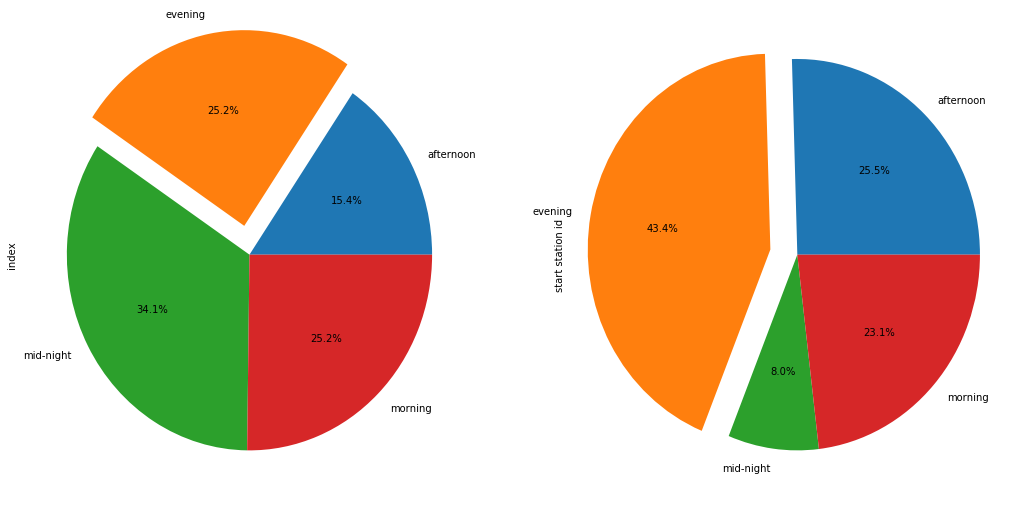

In [292]:
#figure-3

f,(ax1,ax2)=mplt.subplots(1,2,figsize=(18,9))
cars1['index'].plot.pie(labels=cars1['Sessions'],autopct='%1.1f%%',explode=[0,0.15,0,0],ax=ax1)
bikes1['start station id'].plot.pie(labels=bikes1['Sessions'],autopct='%1.1f%%',explode=[0,0.15,0,0],ax=ax2)

mplt.show()

In [293]:
yellow_cars_1=yellow_cars.sample(500000)
yellow_cars_1


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
11408541,1,2016-05-30 17:49:25,2016-05-30 18:36:24,2,18.10,-73.790222,40.643547,2,N,-73.991753,40.760639,1,52.0,0.0,0.5,11.67,5.54,0.3,70.01
11661342,2,2016-05-31 14:39:37,2016-05-31 14:41:56,2,0.35,-73.976639,40.750790,1,N,-73.979912,40.746319,1,3.5,0.0,0.5,0.86,0.00,0.3,5.16
2999517,2,2016-05-08 14:16:12,2016-05-08 14:21:07,5,0.93,-73.968384,40.761711,1,N,-73.965340,40.755211,2,5.5,0.0,0.5,0.00,0.00,0.3,6.30
11482125,2,2016-05-30 22:57:50,2016-05-30 23:03:12,1,1.39,-73.991127,40.733459,1,N,-74.002701,40.725010,2,6.5,0.5,0.5,0.00,0.00,0.3,7.80
2126134,2,2016-05-06 13:17:27,2016-05-06 13:54:54,5,10.66,-73.992844,40.737175,1,N,-73.861870,40.768459,1,35.5,0.0,0.5,8.37,5.54,0.3,50.21
8790997,2,2016-05-25 09:28:46,2016-05-25 09:40:54,5,1.61,-73.979012,40.744690,1,N,-73.993698,40.728321,1,9.5,0.0,0.5,2.06,0.00,0.3,12.36
800793,1,2016-05-02 19:05:25,2016-05-02 19:14:30,1,2.00,-74.002373,40.741249,1,N,-74.005981,40.717476,1,9.0,1.0,0.5,2.15,0.00,0.3,12.95
1626160,2,2016-05-05 10:42:18,2016-05-05 10:52:04,1,2.48,-73.978035,40.736565,1,N,-73.964088,40.762276,1,10.5,0.0,0.5,0.00,0.00,0.3,11.30
4577221,1,2016-05-12 19:43:59,2016-05-12 20:10:30,3,8.90,-73.870842,40.773773,1,N,-73.981369,40.755421,1,29.0,0.5,0.5,7.00,5.54,0.3,42.84
6533965,2,2016-05-17 13:56:36,2016-05-17 14:29:50,1,8.60,-73.863716,40.769581,1,N,-73.953156,40.824242,1,31.0,0.0,0.5,9.34,5.54,0.3,46.68


In [294]:
xlim = [-74.03, -73.77]
ylim = [40.63, 40.85]
yellow_cars_1 = yellow_cars_1[(yellow_cars_1.pickup_longitude> xlim[0]) & (yellow_cars_1.pickup_longitude < xlim[1])]
yellow_cars_1 = yellow_cars_1[(yellow_cars.dropoff_longitude> xlim[0]) & (yellow_cars.dropoff_longitude < xlim[1])]
yellow_cars_1 = yellow_cars_1[(yellow_cars_1.pickup_latitude> ylim[0]) & (yellow_cars_1.pickup_latitude < ylim[1])]
yellow_cars_1 = yellow_cars_1[(yellow_cars_1.dropoff_latitude> ylim[0]) & (yellow_cars_1.dropoff_latitude < ylim[1])]

C:\Users\Sreekanth\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [299]:
yellow_cars_1=yellow_cars_1.reset_index()

In [ ]:
yellow_cars_1['Start_Time']=pd.to_datetime(yellow_cars_1['tpep_pickup_datetime'])
yellow_cars_1['End_Time']=pd.to_datetime(yellow_cars_1['tpep_dropoff_datetime'])
yellow_cars_1['month']=yellow_cars_1['Start_Time'].dt.month
yellow_cars_1['dow']=yellow_cars_1['Start_Time'].dt.dayofweek
yellow_cars_1['hourofday']=yellow_cars_1['Start_Time'].dt.hour
yellow_cars_1['day_week']=yellow_cars_1['Start_Time'].dt.weekday_name
yellow_cars_1['Sessions']=yellow_cars_1.apply(f,axis=1)
yellow_cars_1['day']=yellow_cars_1['Start_Time'].dt.day

In [353]:
yellow_cars_1

,level_0,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,...,improvement_surcharge,total_amount,Start_Time,day,End_Time,month,dow,hourofday,day_week,Sessions
0,0,11408541,1,2016-05-30 17:49:25,2016-05-30 18:36:24,2,18.10,-73.790222,40.643547,2,...,0.3,70.01,2016-05-30 17:49:25,30,2016-05-30 18:36:24,5,0,17,Monday,evening
1,1,11661342,2,2016-05-31 14:39:37,2016-05-31 14:41:56,2,0.35,-73.976639,40.750790,1,...,0.3,5.16,2016-05-31 14:39:37,31,2016-05-31 14:41:56,5,1,14,Tuesday,afternoon
2,2,2999517,2,2016-05-08 14:16:12,2016-05-08 14:21:07,5,0.93,-73.968384,40.761711,1,...,0.3,6.30,2016-05-08 14:16:12,8,2016-05-08 14:21:07,5,6,14,Sunday,afternoon
3,3,11482125,2,2016-05-30 22:57:50,2016-05-30 23:03:12,1,1.39,-73.991127,40.733459,1,...,0.3,7.80,2016-05-30 22:57:50,30,2016-05-30 23:03:12,5,0,22,Monday,mid-night
4,4,2126134,2,2016-05-06 13:17:27,2016-05-06 13:54:54,5,10.66,-73.992844,40.737175,1,...,0.3,50.21,2016-05-06 13:17:27,6,2016-05-06 13:54:54,5,4,13,Friday,afternoon
5,5,8790997,2,2016-05-25 09:28:46,2016-05-25 09:40:54,5,1.61,-73.979012,40.744690,1,...,0.3,12.36,2016-05-25 09:28:46,25,2016-05-25 09:40:54,5,2,9,Wednesday,morning
6,6,800793,1,2016-05-02 19:05:25,2016-05-02 19:14:30,1,2.00,-74.002373,40.741249,1,...,0.3,12.95,2016-05-02 19:05:25,2,2016-05-02 19:14:30,5,0,19,Monday,evening
7,7,1626160,2,2016-05-05 10:42:18,2016-05-05 10:52:04,1,2.48,-73.978035,40.736565,1,...,0.3,11.30,2016-05-05 10:42:18,5,2016-05-05 10:52:04,5,3,10,Thursday,morning
8,8,4577221,1,2016-05-12 19:43:59,2016-05-12 20:10:30,3,8.90,-73.870842,40.773773,1,...,0.3,42.84,2016-05-12 19:43:59,12,2016-05-12 20:10:30,5,3,19,Thursday,evening
9,9,6533965,2,2016-05-17 13:56:36,2016-05-17 14:29:50,1,8.60,-73.863716,40.769581,1,...,0.3,46.68,2016-05-17 13:56:36,17,2016-05-17 14:29:50,5,1,13,Tuesday,afternoon


In [315]:
##INSIGHT-3:::::::::::
import seaborn as sns

In [321]:
a=round((city_bikes1.groupby(['day'])['starttime'].count()).mean())

b=round((yellow_cars_1.groupby(['day'])['index'].count()).mean())



In [327]:
yellow_cars_1.columns

Index(['index', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'Start_Time', 'day',
       'End_Time', 'month', 'dow', 'hourofday', 'day_week', 'Sessions'],
      dtype='object')

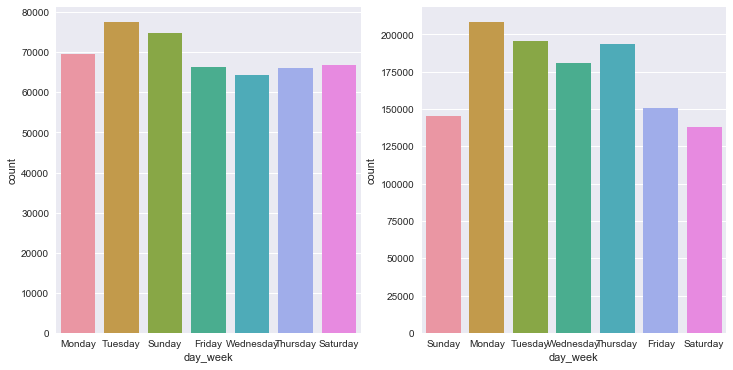

In [342]:
f,(ax1,ax2)=mplt.subplots(1,2,figsize=(12,6))
sns.countplot(x='day_week', data=yellow_cars_1,ax=ax1)
sns.countplot(x='day_week', data=city_bikes1,ax=ax2)
mplt.show()

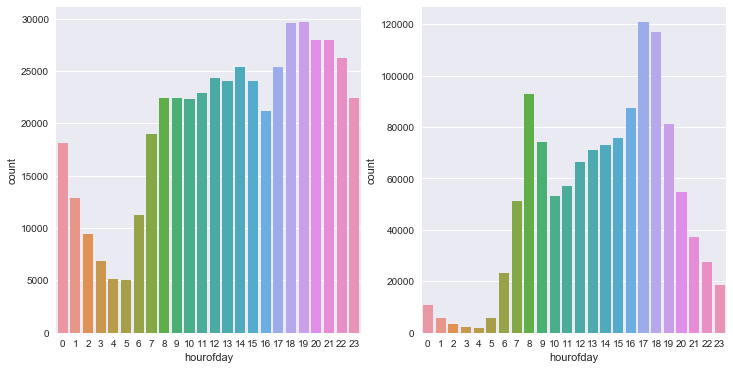

In [343]:
f,(ax1,ax2)=mplt.subplots(1,2,figsize=(12,6))
sns.countplot(x='hourofday', data=yellow_cars_1,ax=ax1)
sns.countplot(x='hourofday', data=city_bikes1,ax=ax2)
mplt.show()

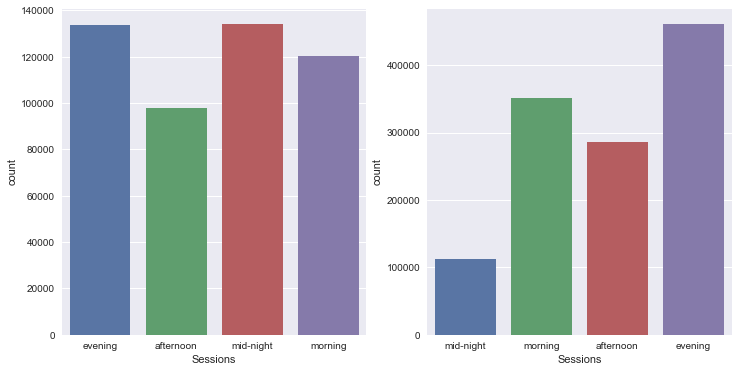

In [344]:
f,(ax1,ax2)=mplt.subplots(1,2,figsize=(12,6))
sns.countplot(x='Sessions', data=yellow_cars_1,ax=ax1)
sns.countplot(x='Sessions', data=city_bikes1,ax=ax2)
mplt.show()